In [79]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
import os

In [80]:
cars = pd.read_csv('C:/Users/kp/Desktop/MITA_SEM_1/DAV/autos.csv',encoding = "ISO-8859-1")

In [81]:
del cars['dateCrawled']
del cars['name']
del cars['dateCreated']
del cars['postalCode']
del cars['nrOfPictures']
del cars['lastSeen']

In [82]:
print(cars.groupby('seller').size())

seller
gewerblich         3
privat        371525
dtype: int64


In [83]:
print(cars.groupby('offerType').size())


offerType
Angebot    371516
Gesuch         12
dtype: int64


In [84]:
cars = cars[cars.offerType != 'Gesuch']
del cars["offerType"]

cars.head()

,seller,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,privat,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,privat,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,privat,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,privat,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,privat,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


In [85]:
del cars['seller']
del cars['abtest']
del cars['yearOfRegistration']
del cars['monthOfRegistration']

In [86]:
cars.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


In [87]:
cars.isnull().sum()

price                      0
vehicleType            37862
yearOfRegistration         0
gearbox                20203
powerPS                    0
model                  20481
kilometer                  0
monthOfRegistration        0
fuelType               33379
brand                      0
notRepairedDamage      72054
dtype: int64

In [88]:
cars["vehicleType"].fillna("Other", inplace=True)
cars["gearbox"].fillna("Unspecified", inplace=True)
cars["fuelType"].fillna("other",inplace=True)
cars["notRepairedDamage"].fillna("other",inplace=True)
cars["model"].fillna("Other",inplace=True)
cars.isnull().sum()


price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

In [89]:
#find the unique values
print("Vehicle",cars.vehicleType.unique())
print("GearBox",cars.gearbox.unique())
print("Model",cars.model.unique())
print("Fuel",cars.fuelType.unique())
print("Brand",cars.brand.unique())
print("Damage",cars.notRepairedDamage.unique())


Vehicle ['Other' 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']
GearBox ['manuell' 'automatik' 'Unspecified']
Model ['golf' 'Other' 'grand' 'fabia' '3er' '2_reihe' 'andere' 'c_max' '3_reihe'
 'passat' 'navara' 'ka' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er'
 'meriva' 'arosa' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio'
 'kadett' 'kangoo' 'corsa' 'one' 'fortwo' '1er' 'b_klasse' 'signum'
 'astra' 'a8' 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156'
 'escort' 'forester' 'xc_reihe' 'scenic' 'a4' 'a1' 'insignia' 'combo'
 'focus' 'tt' 'a6' 'jazz' 'omega' 'slk' '7er' '80' '147' 'glk' '100'
 'z_reihe' 'sportage' 'sorento' 'v40' 'ibiza' 'mustang' 'eos' 'touran'
 'getz' 'a3' 'almera' 'megane' 'lupo' 'r19' 'zafira' 'caddy' 'mondeo'
 'cordoba' 'colt' 'impreza' 'vectra' 'berlingo' 'm_klasse' 'tiguan'
 'i_reihe' 'espace' 'sharan' '6_reihe' 'panda' 'up' 'seicento' 'ceed'
 '5_reihe' 'yeti' 'octavia' 'mii' 'rx_reihe' '6er' 'modus' 'fox' 'matiz'
 'beetle' '

In [90]:
#find the age of car
cars['ageOfCar'] = (2018-cars['yearOfRegistration'])*12 + (5- cars['monthOfRegistration'])


In [93]:
cars.head()

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,ageOfCar
0,480,Other,manuell,0,golf,150000,benzin,volkswagen,other,305
1,18300,coupe,manuell,190,Other,125000,diesel,audi,ja,84
2,9800,suv,automatik,163,grand,125000,diesel,jeep,other,165
3,1500,kleinwagen,manuell,75,golf,150000,benzin,volkswagen,nein,203
4,3600,kleinwagen,manuell,69,fabia,90000,diesel,skoda,nein,118


In [100]:
print(cars.groupby(['vehicleType','brand','model']).sum())

                            price  gearbox  powerPS  kilometer  fuelType  \
vehicleType brand model                                                    
0           0     1      74190149       12      623      165.0        51   
                  2        141897      132     7238     1092.5       257   
                  3         38452       66     4360      625.0       212   
                  4         61249       17     1346      131.0        66   
                  26        94742       67     3963      668.0       304   
                  41        83289       21     1613      281.0       134   
                  213       88084        9      828      141.0        63   
            1     0         44792       30     2121      372.5       135   
                  7             0        0        0       15.0         7   
                  20       131725      206    10824     2136.0       682   
                  22        29567       22     1584      231.5        97   
            

In [101]:
cars['kilometer'] = cars['kilometer']/10000


In [102]:

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
cars["model"] = lb_make.fit_transform(cars['model'])
cars["gearbox"] = lb_make.fit_transform(cars['gearbox'])
cars["fuelType"] = lb_make.fit_transform(cars['fuelType'])
cars["notRepairedDamage"] = lb_make.fit_transform(cars['notRepairedDamage'])
cars["vehicleType"] = lb_make.fit_transform(cars['vehicleType'])
cars["brand"] = lb_make.fit_transform(cars['brand'])


In [103]:
cars

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,ageOfCar
0,480,0,2,0,119,0.00150,1,38,2,305
1,18300,4,2,190,26,0.00125,3,1,0,84
2,9800,8,1,163,120,0.00125,3,14,2,165
3,1500,5,2,75,119,0.00150,1,38,1,203
4,3600,5,2,69,104,0.00090,3,31,1,118
5,650,7,2,102,11,0.00150,1,2,0,271
6,2200,3,2,109,8,0.00150,1,25,1,165
7,0,7,2,50,41,0.00040,1,38,1,454
8,14500,2,2,125,62,0.00030,1,10,2,45
9,999,5,2,101,119,0.00150,7,38,2,245


In [98]:
cars.shape

(371516, 10)

In [99]:
cars_drop_dup = cars.drop_duplicates() #Drops all the redundent values
cars_drop_dup.shape #Displays the dimensions of the dataset in terms of rows and columns

(342886, 10)

In [104]:
cars = cars.iloc[0:12000,:]
y = cars.iloc[:,0]
X = cars.iloc[:,1:9]

In [105]:
X.shape, y.shape

((12000, 8), (12000,))

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1, test_size = 0.8)


In [107]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()


In [108]:
reg1.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [109]:
 y_pred= reg1.predict(X_test)

In [119]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))


3755.751358122828
92084890.36109316
61.284185220355404


In [120]:
from sklearn.tree import DecisionTreeRegressor
reg2 = DecisionTreeRegressor(max_depth=2, )
reg2.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [121]:
 y_pred= reg2.predict(X_test)

In [122]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

4620.051366983528
187111345.89939764
67.97095973269414


In [125]:
from sklearn.ensemble import RandomForestRegressor
reg3 = RandomForestRegressor(min_samples_split= 5, min_samples_leaf= 20, max_depth=10)
reg3.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=20, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [126]:
 y_pred= reg3.predict(X_test)

In [127]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))


2831.7797593575688
47529468.58979034
53.214469454816225


In [32]:
accuracy = reg1.score(X_test,y_test)
print(accuracy*100,'%')

22.126908726727777 %


In [128]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

In [129]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

3942.6261458333333
77168579.0934375
62.79033481224108


In [36]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [37]:
y_pred = clf.predict(X_test)

In [38]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

3779.40975
199676220.5345
61.47690419987005


In [130]:
import numpy as np
from sklearn.svm import SVC

clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [131]:
y_pred = clf.predict(X_test)

In [132]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

4943.067916666667
107167538.35583334
70.30695496653703


In [42]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [43]:
y_pred = clf.predict(X_test)

In [44]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))


5517.32525
499182070.0585
74.27869984053302


In [60]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [61]:
y_pred = model.predict(X_test)

C:\Users\kp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [62]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))


3348.45425
45190081.62475
57.86582972705049


C:\Users\kp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


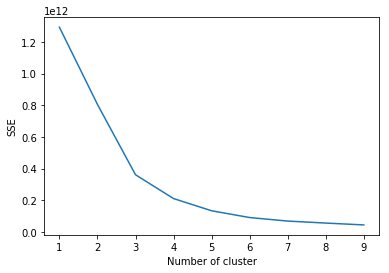

In [133]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(cars)
    cars["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


In [142]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)

In [143]:
kmeans.fit(X_train,y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [144]:
y_pred = kmeans.predict(X_test)

In [148]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

5834.09875
120671495.93729167
76.3812722465396
0.0012531155366311433


C:\Users\kp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


C:\Users\kp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


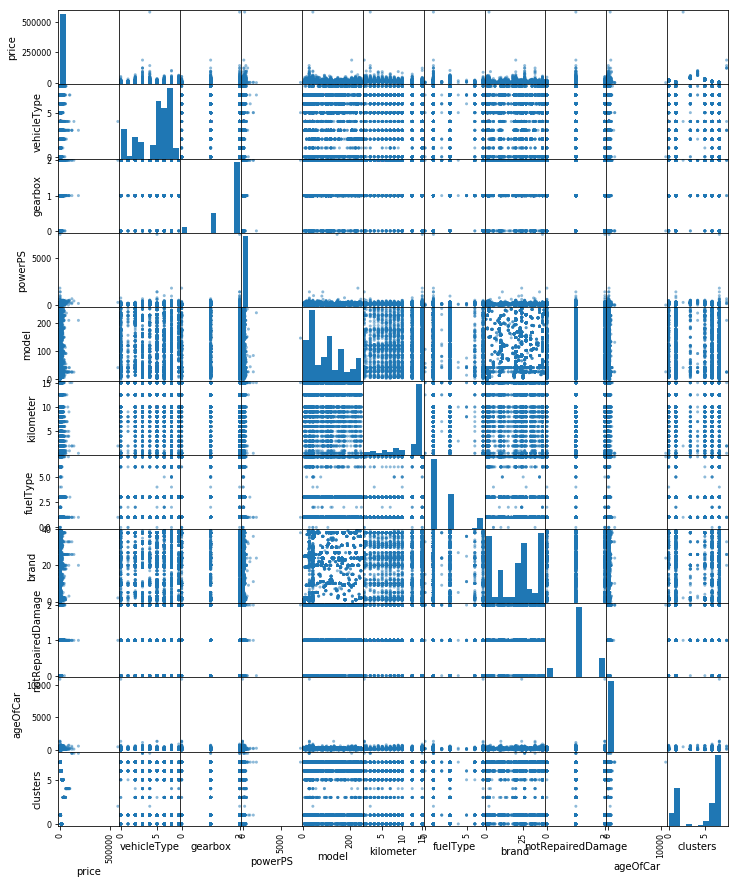

In [63]:
pd.scatter_matrix(cars, figsize=(12, 15))
plt.show()

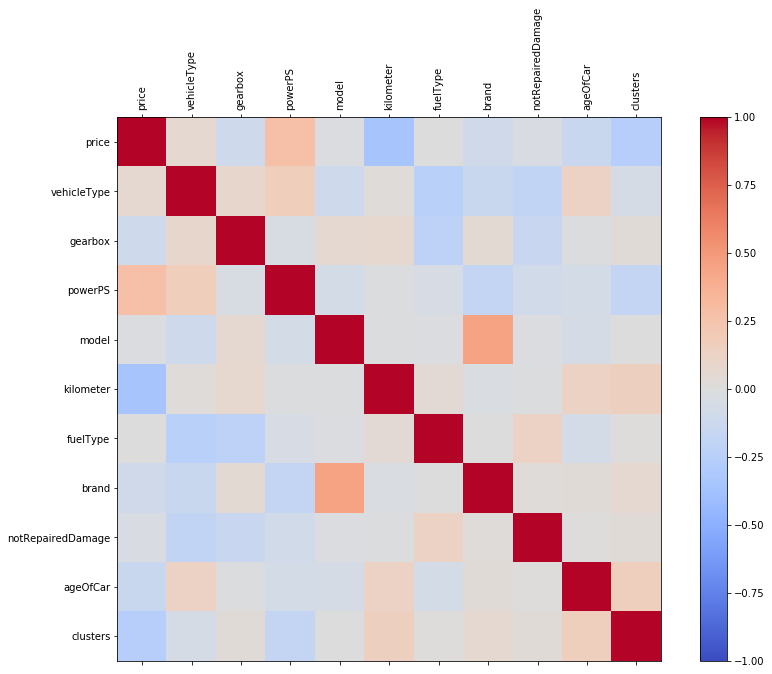

In [64]:
corr = cars.corr()
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(cars.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(cars.columns)
ax.set_yticklabels(cars.columns)
plt.show()